In [67]:
%matplotlib inline
import pandas as pd
idx = pd.IndexSlice

In [68]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [69]:
%%time
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)

CPU times: user 5.16 s, sys: 597 ms, total: 5.75 s
Wall time: 5.78 s


In [70]:
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [71]:
%%time
release_dates = pd.read_csv('data/release_dates.csv', index_col=None,
                            parse_dates=['date'], infer_datetime_format=True)

CPU times: user 569 ms, sys: 62.3 ms, total: 632 ms
Wall time: 631 ms


In [72]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#Beings,2015,Romania,2015-01-29
2,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
3,#Horror,2015,USA,2015-11-20
4,#Horror,2015,UK,2016-05-16


In [73]:
titles = cast[['title', 'year']].drop_duplicates().reset_index(drop=True)
titles.head()

,title,year
0,Closet Monster,2015
1,Suuri illusioni,1985
2,Battle of the Sexes,2017
3,Secret in Their Eyes,2015
4,Steve Jobs,2015


### Years

In [74]:
# 1. How many movies are listed in the `titles` dataframe?

len(titles)

193679

In [75]:
# 1. What is the name and year of the very first movie ever made?

titles.sort_values('year').head(1)

,title,year
138256,Miss Jerry,1894


In [76]:
# 1. How many years into the future does the IMDB database list movie titles?

titles.sort_values('year').tail(3)#.year - 2015

,title,year
24131,Inside Me,2024
140158,Avatar 5,2025
178070,100 Years,2115


In [77]:
# 1. How many movies listed in `titles` came out in 1950?

len(titles[titles.year == 1950])

# or: (titles.year == 1950).sum()

921

In [78]:
# 1. How many movies came out in 1960?

len(titles[titles.year == 1960])

1113

In [79]:
# 1. How many movies came out in each year of the 1970s?
#    (Hint: try a Python "for" loop.)

for y in range(1970, 1980):
    print(y, (titles.year == y).sum())

1970 1560
1971 1418
1972 1480
1973 1505
1974 1484
1975 1313
1976 1341
1977 1310
1978 1303
1979 1347


In [80]:
# 1. How many movies came out during your own lifetime,
#    from the year of your birth through 2014?

len(titles[(titles.year >= 1984) & (titles.year <= 2014)])

94966

In [81]:
# 2. Use "value_counts" to determine how many movies came out
#    in each year of the 1970s.

titles[titles.year // 10 == 197].year.value_counts().sort_index()

1970    1560
1971    1418
1972    1480
1973    1505
1974    1484
1975    1313
1976    1341
1977    1310
1978    1303
1979    1347
Name: year, dtype: int64

In [82]:
# 3. Use "groupby" to determine how many movies came out in each year of the 1970s.

titles.groupby('year').size().loc[1970:1979]

year
1970    1560
1971    1418
1972    1480
1973    1505
1974    1484
1975    1313
1976    1341
1977    1310
1978    1303
1979    1347
dtype: int64

### Titles

In [83]:
# 1. What are the names of the movies made through 1906?

titles[titles.year <= 1906][['title']]

,title
120962,The Story of the Kelly Gang
138256,Miss Jerry
148633,Valsons
158286,The Joe Gans-Battling Nelson Fight
175334,Lika mot lika
182968,Soldiers of the Cross


In [84]:
# 1. What movies have titles that fall between Star Trek and Star Wars in the alphabet?

titles[(titles.title >= 'Star Trek') & (titles.title <= 'Star Wars')]

,title,year
4905,Star Trek: Insurrection,1998
5479,Star Trek,2009
5480,Star Trek Into Darkness,2013
11752,Star Trek IV: The Voyage Home,1986
19257,Star Trek Beyond,2016
25843,Star Trek: Generations,1994
26287,Star Trek: Captain Pike,2016
32086,Star Trek III: The Search for Spock,1984
39915,Star Trek: First Contact,1996
42116,Star Trek: Horizon,2016


In [85]:
# 2. Use an index and .loc[] to find the movies whose titles fall between Star Trek
#    and Star Wars in the alphabet.

t = titles.copy()
t = t.set_index('title').sort_index()
t.loc['Star Trek':'Star Wars']

,year
title,
Star Trek,2009
Star Trek Beyond,2016
Star Trek I: Specter of the Past,2010
Star Trek III: The Search for Spock,1984
Star Trek IV: The Voyage Home,1986
Star Trek Into Darkness,2013
Star Trek V: The Final Frontier,1989
Star Trek VI: The Undiscovered Country,1991
Star Trek: Captain Pike,2016


In [86]:
# 2. Use an index and .loc[] to retrieve the names of the movies made through 1906.

titles.set_index('year').sort_index().loc[1800:1906]

,title
year,
1894,Miss Jerry
1900,Soldiers of the Cross
1905,Valsons
1906,Lika mot lika
1906,The Joe Gans-Battling Nelson Fight
1906,The Story of the Kelly Gang


In [87]:
# 2. What are the 15 most common movie titles in film history?

titles.title.value_counts().head(15)

Hamlet                  20
Macbeth                 15
Carmen                  14
The Outsider            12
Maya                    12
Othello                 11
Temptation              10
Anna Karenina           10
She                     10
Vengeance               10
Paradise                10
Amok                     9
Damaged Goods            9
The Three Musketeers     9
Kismet                   9
Name: title, dtype: int64

In [88]:
# Use this for session 3?

i = cast.set_index('name').sort_index()

n                 
       min       mean   max
year                       
1932   1.0   4.571429   9.0
1933   1.0   3.166667  10.0
1934   1.0   1.500000   2.0
1935   1.0   1.750000   2.0
1936   1.0   1.750000   3.0
1937   2.0   2.000000   2.0
1938   2.0   2.000000   2.0
1939   1.0   1.333333   2.0
1940   1.0   1.250000   2.0
1941   1.0   1.500000   2.0
1942   1.0   1.000000   1.0
1943   1.0   1.000000   1.0
1944   1.0   1.000000   1.0
1945   NaN        NaN   NaN
1946   1.0   1.000000   1.0
1947   1.0   1.000000   1.0
1948   1.0   1.000000   1.0
1949   1.0   1.000000   1.0
1950   1.0   1.000000   1.0
1951   1.0   1.000000   1.0
1952   1.0   1.000000   1.0
1953   1.0   1.000000   1.0
1955   1.0   1.000000   1.0
1957   1.0   1.000000   1.0
1958   1.0   1.000000   1.0
1959   1.0   1.000000   1.0
1960   1.0   1.000000   1.0
1962   1.0   1.000000   1.0
1963   1.0   1.000000   1.0
1964   1.0   1.000000   1.0
1966   1.0   1.000000   1.0
1981   NaN        NaN   NaN
1982  10.0  10.000000  10.0
1988   NaN        NaN   NaN
2015   NaN        NaN   NaN

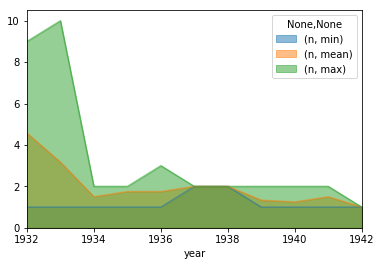

In [89]:
a = i.loc['Cary Grant',['year','n']].groupby('year').agg(['min', 'mean', 'max'])
a.loc[:1942].plot(kind='area', stacked=False)
a

In [90]:
# 5. What are the 5 longest movie titles ever?

pd.set_option('max_colwidth', 300)

t = titles.copy()
t['len'] = t.title.str.len()
t = t.sort_values('len', ascending=False)
t.head()

,title,year,len
184470,"Night of the Day of the Dawn of the Son of the Bride of the Return of the Revenge of the Terror of the Attack of the Evil Mutant Hellbound Flesh Eating Crawling Alien Zombified Subhumanoid Living Dead, Part 5",2011,208
190521,"Night of the Day of the Dawn of the Son of the Bride of the Return of the Revenge of the Terror of the Attack of the Evil, Mutant, Hellbound, Flesh-Eating Subhumanoid Zombified Living Dead, Part 3",2005,196
13887,"Brigitte, Laura, Ursula, Monica, Raquel, Litz, Florinda, Barbara, Claudia, e Sofia le chiamo tutte... anima mia",1974,111
159657,"Film d'amore e d'anarchia, ovvero 'stamattina alle 10 in via dei Fiori nella nota casa di tolleranza...'",1973,104
27588,Those Magnificent Men in Their Flying Machines or How I Flew from London to Paris in 25 hours 11 minutes,1965,104


In [91]:
# 5. What are the 15 most popular movie titles, if you strip off the suffixes like
#    (II) and (III) that the IMDB adds to distinguish movies shown in the same year?
# , expand=False
titles.title.str.extract('^([^(]*)').value_counts().head(15)

/Users/aelaibi/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  after removing the cwd from sys.path.


Hamlet           20
Broken           19
                 17
Macbeth          15
Carmen           14
Alone            13
Maya             12
The Outsider     12
Othello          11
Temptation       10
She              10
Vengeance        10
Paradise         10
Gone             10
Anna Karenina    10
Name: title, dtype: int64

### How many movies actors have been in

In [92]:
# 1. How many movies has Judi Dench acted in?

len(cast[cast.name == 'Judi Dench'])

54

In [93]:
# 1. How many movies did Sidney Poitier appear in?

c = cast
c = c[c.name == 'Sidney Poitier']
len(c)

43

In [94]:
# 1. In how many of his movies was Sidney Poitier the lead (`n==1`)?

c = cast
c = c[c.name == 'Sidney Poitier']
c = c[c.n == 1]
len(c)

21

### Pulling and displaying movie credits

In [95]:
# 1. List the movies, sorted by year, in which Judi Dench starred as lead actor.

c = cast
c = c[c.name == 'Judi Dench']
c = c[c.n == 1]
c.sort_values('year')

,title,year,name,type,character,n
2792928,Mrs Brown,1997,Judi Dench,actress,Queen Victoria,1.0
2792925,Ladies in Lavender,2004,Judi Dench,actress,Ursula,1.0
2792929,Mrs Henderson Presents,2005,Judi Dench,actress,Mrs. Laura Henderson,1.0
2792933,Notes on a Scandal,2006,Judi Dench,actress,Barbara Covett,1.0
2792946,The Best Exotic Marigold Hotel,2011,Judi Dench,actress,Evelyn Greenslade,1.0
2792934,Philomena,2013,Judi Dench,actress,Philomena,1.0
2792955,Victoria and Abdul,2017,Judi Dench,actress,Queen Victoria,1.0


In [96]:
# 1. Who was credited in the 1972 version of Sleuth, in order by `n` rank?

c = cast
c = c[c.title == 'Sleuth']
c = c[c.year == 1972]
c.sort_values('n')

,title,year,name,type,character,n
1697110,Sleuth,1972,Laurence Olivier,actor,Andrew Wyke,1.0
325302,Sleuth,1972,Michael Caine,actor,Milo Tindle,2.0
372290,Sleuth,1972,Alec Cawthorne,actor,Inspector Doppler,3.0
1458303,Sleuth,1972,John (II) Matthews,actor,Detective Sergeant Tarrant,4.0
2705900,Sleuth,1972,Eve (III) Channing,actress,Marguerite Wyke,5.0
1441628,Sleuth,1972,Teddy Martin,actor,Police Constable Higgs,6.0


### Common character names

In [97]:
# 2. What are the 11 most common character names in movie history?

cast.character.value_counts().head(11)

Himself        20746
Dancer         12263
Extra          11645
Reporter        8342
Doctor          7592
Student         7577
Party Guest     7062
Policeman       6992
Nurse           6825
Bartender       6751
Herself         6557
Name: character, dtype: int64

In [100]:
# 3. Which actors have played the role “Zombie” the most times?

c = cast
c = c[c.character == 'Zombie']
c = c.groupby('name').size().sort_values()
c.tail(5)

name
Ross Harris           3
Lee Hartman           3
William Mogush        3
Ella Mae Smith        3
John (II) Migliore    9
dtype: int64

In [102]:
# 3. Which ten people have appeared most often as “Herself” over the history of film?

c = cast
c = c[c.character == 'Herself']
c = c.groupby('name').size().sort_values()
c.tail(10)

name
Hillary Clinton        7
Marta Berrocal         8
In?s J. Southern       8
Marina Revilla         8
Estrella Borja         8
Mary Jo Pehl           9
Margaret Thatcher      9
Joyce Brothers         9
Laura (II) M?gica      9
Queen Elizabeth II    12
dtype: int64

In [103]:
# 3. Which ten people have appeared most often as “Himself” over the history of film?

c = cast
c = c[c.character == 'Himself']
c = c.groupby('name').size().sort_values()
c.tail(10)

name
Bill Clinton          22
Benito Mussolini      22
Martin Luther King    22
Winston Churchill     23
Ron Jeremy            23
George W. Bush        25
John F. Kennedy       36
Ronald Reagan         40
Richard Nixon         46
Adolf Hitler          99
dtype: int64

In [104]:
# 4. Take the 50 most common character names in film.
#    Which are most often played by men?

c = cast
clist = c.character.value_counts().head(50)
clist.head()

Himself     20746
Dancer      12263
Extra       11645
Reporter     8342
Doctor       7592
Name: character, dtype: int64

In [105]:
clist.tail()

Frank    2413
Girl     2407
Boy      2351
Alex     2341
Mary     2324
Name: character, dtype: int64

In [106]:
cast_by_character = cast.sort_values('character').set_index('character')

In [107]:
c = cast_by_character.loc[clist.index][['type']]
c = c.reset_index()
c = c.groupby(['character', 'type']).size()
c = c.unstack()
c['ratio'] = c.actress / (c.actor + c.actress)
c = c.sort_values('ratio')
c.head()

type,actor,actress,ratio
character,,,
John,2763,1,0.000362
Townsman,5808,4,0.000688
Henchman,5046,5,0.000990
Himself,20722,24,0.001157
Policeman,6981,11,0.001573


In [108]:
# 4. …which of those 50 characters are most often played by women?

c.tail()

type,actor,actress,ratio
character,,,
Anna,85,2614,0.968507
Mary,50,2274,0.978485
Girl,46,2361,0.980889
Herself,65,6492,0.990087
Maria,27,2810,0.990483


In [109]:
# 4. …which of those 50 characters have a ratio closest to 0.5?

c[(c.ratio > 0.4) & (c.ratio < 0.6)]

type,actor,actress,ratio
character,,,
Restaurant Patron,1438,1035,0.418520
Extra,6689,4956,0.425590
Student,4184,3393,0.447803
Wedding Guest,1500,1236,0.451754
Singer,1561,1609,0.507571


### Who has been in the most movies

In [110]:
# 2. Which actors or actresses appeared in the most movies in the year 1945?

cast[cast.year == 1945].name.value_counts().head(10)

Emmett Vogan       39
Sam (II) Harris    32
Bess Flowers       29
Harold Miller      29
Nolan Leary        27
Frank O'Connor     27
Franklyn Farnum    27
Larry Steers       25
Pierre Watkin      24
Herman Hack        24
Name: name, dtype: int64

In [111]:
# 2. Which actors or actresses appeared in the most movies in the year 1985?

cast[cast.year == 1985].name.value_counts().head(10)

Mammootty        22
Shakti Kapoor    21
Sukumari         20
Aruna Irani      15
Lou Scheimer     15
Mohanlal         15
Raj Babbar       15
Rajesh Khanna    13
Asrani           13
Deven Verma      13
Name: name, dtype: int64

In [114]:
%%time
# 2. Create a `cast_by_title_year` dataframe indexed by title and year
#    to use in the next few questions.

cast_by_title_year = cast.set_index(['title', 'year']).sort_index()
cast_by_title_year.head()

CPU times: user 6.23 s, sys: 506 ms, total: 6.74 s
Wall time: 6.8 s


In [113]:
%%time
# 2. Use `cast_by_title_year` to find the stars of the film Inception
#    and order them by `n` before displaying the top 10.

cast_by_title_year.loc['Inception'].sort_values('n').head(10)

CPU times: user 41.3 ms, sys: 812 µs, total: 42.1 ms
Wall time: 41.5 ms


,name,type,character,n
year,,,,
2010,Leonardo DiCaprio,actor,Cobb,1.0
2010,Joseph Gordon-Levitt,actor,Arthur,2.0
2010,Ellen Page,actress,Ariadne,3.0
2010,Tom Hardy,actor,Eames,4.0
2010,Ken Watanabe,actor,Saito,5.0
2010,Dileep Rao,actor,Yusuf,6.0
2010,Cillian Murphy,actor,Robert Fischer,7.0
2010,Tom Berenger,actor,Browning,8.0
2010,Marion Cotillard,actress,Mal,9.0


In [115]:
# 2. Use `cast_by_title_year` to find the first 10 stars in the 1996 film Hamlet,
#    and order them by `n`.

cast_by_title_year.loc['Hamlet',1996].sort_values('n').head(10)

name     type                 character     n
title  year                                                               
Hamlet 1996            Riz Abbasi    actor     Attendant to Claudius   1.0
       1996  Richard Attenborough    actor        English Ambassador   2.0
       1996       David (V) Blair    actor     Attendant to Claudius   3.0
       1996         Brian Blessed    actor  Ghost of Hamlet's Father   4.0
       1996       Kenneth Branagh    actor                    Hamlet   5.0
       1996        Richard Briers    actor                  Polonius   6.0
       1996        Michael Bryant    actor                    Priest   7.0
       1996          Peter Bygott    actor     Attendant to Claudius   8.0
       1996        Julie Christie  actress                  Gertrude   9.0
       1996         Billy Crystal    actor         First Gravedigger  10.0

In [116]:
%%time
# 2. Write a `for` loop that, for the top 9 actors in the 1977 movie Star Wars,
#    determines how many movies they starred in after 1977.

names = cast_by_title_year.loc['Star Wars',1977].sort_values('n').head(9).name
for name in names:
    print(name, len(cast[(cast.name == name) & (cast.year > 1977)]))

Mark Hamill 48
Harrison Ford 44
Carrie Fisher 43
Peter Cushing 10
Alec Guinness 10
Anthony Daniels 14
Kenny Baker 18
Peter (II) Mayhew 9
David Prowse 5
CPU times: user 2.88 s, sys: 50.1 ms, total: 2.93 s
Wall time: 2.93 s


In [117]:
# 2. Create an indexed version of `cast` that, once built, lets you answer
#    the previous question with a `for` loop that finishes in under a second.

i = cast.set_index('name').sort_index()

In [118]:
%%time
for name in names:
    c = i.loc[name]
    c = c[c.year > 1977]
    #c = c[(c.character != 'Himself') & (c.character != 'Herself')]
    print(name, len(c))

Mark Hamill 48
Harrison Ford 44
Carrie Fisher 43
Peter Cushing 10
Alec Guinness 10
Anthony Daniels 14
Kenny Baker 18
Peter (II) Mayhew 9
David Prowse 5
CPU times: user 725 ms, sys: 46.4 ms, total: 771 ms
Wall time: 769 ms


In [119]:
# 3. How many people were cast in each of the movies named "Hamlet”?

c = cast
c = c[c.title == 'Hamlet']
c = c.groupby('year').size() 
c

year
1910     1
1911     6
1913    21
1921     9
1948    24
1954     5
1964    33
1969    24
1973     8
1976    11
1987     3
1990    29
1996    54
2000    38
2009    17
2011    12
2014     1
2015    23
2016     8
2017    15
dtype: int64

In [120]:
# 5. How many actors are in the cast of each version of Hamlet,
#    including Hamlets with IMDB name collisions like "Hamlet (II)"
#    and "Hamlet (III)"? [BAD]

c = cast_by_title_year
# c.loc['Hamlet':'Hamlet (Z'].index.value_counts()    - Drat
# c.loc['Hamlet':'Hamlet (Z'].groupby(level=0).size() - Drat
# c.loc['Hamlet':'Hamlet (Z'].groupby(level=1).size() - Drat
c.loc['Hamlet':'Hamlet (Z'].groupby(level=[0,1]).size()

# Or:
#c = cast[(cast.title >= 'Hamlet') & (cast.title < 'Hamlet (Z')]
#c.groupby(['title', 'year']).size()

title         year
Hamlet        1910     1
              1911     6
              1913    21
              1921     9
              1948    24
              1954     5
              1964    33
              1969    24
              1973     8
              1976    11
              1987     3
              1990    29
              1996    54
              2000    38
              2009    17
              2011    12
              2014     1
              2015    23
              2016     8
              2017    15
Hamlet (II)   1964    21
              2005    20
              2007    16
              2015    10
              2017    18
Hamlet (III)  2007     2
dtype: int64

### Actors and Actresses

In [121]:
# 4. Build a dataframe with a row for each year with two columns:
#    the number of roles for actors in that year's films,
#    and the number of roles for actresses.

aa = cast[['year', 'type']].groupby(['year', 'type']).size()
aa = aa.loc[:2014].unstack()
aa.head()

type,actor,actress
year,,
1894,2.0,1.0
1900,2.0,NaN
1905,1.0,NaN
1906,14.0,3.0
1907,5.0,NaN


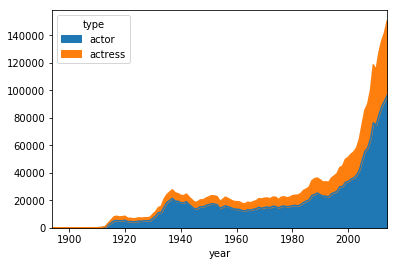

In [122]:
# 4. Use that dataframe to make a kind='area' plot showing the total
#    number of roles available over the history of film.

aa.plot(kind='area')

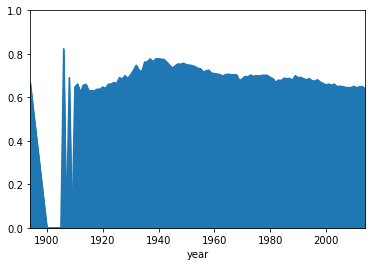

In [123]:
f = aa.actor / (aa.actor + aa.actress)
f.plot(ylim=[0,1], kind='area')

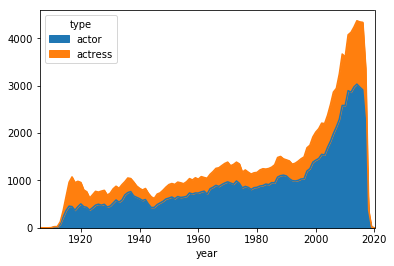

In [124]:
c = cast
#c = c[c.year // 10 == 198]
c = c[c.n <= 3]
c = c.groupby(['year', 'type', 'n']).size()
c = c.unstack(1)
c.swaplevel(0,1).loc[1].plot(ylim=0, kind='area')
#f = c.actor / (c.actor + c.actress)
#f = f.unstack()
#f.plot(ylim=[0,1])

### Rank over time

In [125]:
# 2. Define “leading actor” as an actor or actress whose `n==1`
#    and “supporting actor” as `n==2` — what is the average year
#    of all the supporting roles Judi Dench has had?

c = cast
c = c[c.name == 'Judi Dench']
print(c[c.n == 2].year.mean())

1986.8333333333333


In [128]:
# 2. What is the average year of Judi Dench’s leading roles —
#    is her career moving forwards toward leading roles
#    or backwards towards supporting ones?

print(c[c.n == 1].year.mean())

2007.5714285714287


In [129]:
# 2. Did Sidney Poitier move forward or back over his career?

c = cast
c = c[c.name == 'Sidney Poitier']
print(c[c.n == 2].year.mean())
print(c[c.n == 1].year.mean())

1961.75
1970.4761904761904


In [130]:
# 2. What about Michael Caine?

c = cast
c = c[c.name == 'Michael Caine']
print(c[c.n == 2].year.mean())
print(c[c.n == 1].year.mean())

1989.6818181818182
1984.148148148148


In [131]:
c = cast
#c = c[c.year // 10 == 195]
c = c[c.n.notnull()].groupby('name').n.agg(['size', 'mean'])
c.head()

,size,mean
name,,
!Mystery Girl!,1,29.0
$hutter,1,10.0
'Ace' Reitman,1,11.0
'Agent' Ava Hubbard,1,29.0
'Amarillo Slim' Preston,1,31.0


In [132]:
c = c[c['size'] >= 10]
c = c.sort_values('mean')
c.head(60)

,size,mean
name,,
Harold Lloyd,20,1.000000
Prabhas,18,1.000000
Joe Sears,10,1.000000
Emily Stevens,16,1.000000
Stefan Kramer,19,1.000000
Billie Rhodes,10,1.000000
Ganesh (XII),23,1.000000
Am?cio Mazzaropi,21,1.000000
Carl Brisson,11,1.000000


### Release dates

In [133]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#Beings,2015,Romania,2015-01-29
2,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
3,#Horror,2015,USA,2015-11-20
4,#Horror,2015,UK,2016-05-16


In [134]:
# 5. In which month is a movie whose name starts with the text
#    "The Lord of the Rings" most likely to be released?

r = release_dates
r = r[r.title.str.startswith('The Lord of the Rings')]
r = r[r.country == 'USA']
r.date.dt.month.value_counts()

12    3
11    1
Name: date, dtype: int64

In [135]:
# 5. In which months is a movie whose name ends in the word "Christmas"
#    most likely to be released?

r = release_dates
r = r[r.title.str.endswith('Christmas')]
r = r[r.country == 'USA']
r.date.dt.month.value_counts()

11    24
12    14
10     9
8      1
7      1
4      1
2      1
1      1
Name: date, dtype: int64

In [136]:
rd = release_dates.set_index(['title', 'year']).sort_index()
rd.head()

country       date
title                  year                        
#73, Shaanthi Nivaasa  2007        India 2007-06-15
#Beings                2015      Romania 2015-01-29
#Ewankosau saranghaeyo 2015  Philippines 2015-01-21
#Horror                2015          USA 2015-11-20
                       2015           UK 2016-05-16

In [137]:
rd.loc[[('#Beings', 2015), ('#Horror', 2015)]]

country       date
title   year                    
#Beings 2015  Romania 2015-01-29
#Horror 2015      USA 2015-11-20
        2015       UK 2016-05-16

In [138]:
c = cast
c = c[c.name == 'Tom Cruise'][['title', 'year']].drop_duplicates()
#c = c.join(rd, ['title', 'year'])
#c = c[c.country == 'USA']
#c.date.dt.month.value_counts().sort_index().plot(kind='bar')
c.values

array([['A Few Good Men', 1992],
       ['All the Right Moves', 1983],
       ['American Made', 2017],
       ['August', 2008],
       ['Austin Powers in Goldmember', 2002],
       ['Born on the Fourth of July', 1989],
       ['Cocktail', 1988],
       ['Collateral', 2004],
       ['Days of Thunder', 1990],
       ['Edge of Tomorrow', 2014],
       ['Endless Love', 1981],
       ['Eyes Wide Shut', 1999],
       ['Far and Away', 1992],
       ['Interview with the Vampire: The Vampire Chronicles', 1994],
       ['Jack Reacher', 2012],
       ['Jack Reacher: Never Go Back', 2016],
       ['Jerry Maguire', 1996],
       ['Knight and Day', 2010],
       ['Legend', 1985],
       ['Lions for Lambs', 2007],
       ["Losin' It", 1983],
       ['Magnolia', 1999],
       ['Minority Report', 2002],
       ['Mission: Impossible', 1996],
       ['Mission: Impossible - Ghost Protocol', 2011],
       ['Mission: Impossible - Rogue Nation', 2015],
       ['Mission: Impossible 6', 2018],
       ['Mission

In [ ]:
# ASK
# rd.loc[c]
# rd.loc[c.values]
# rd.loc[list(c.values)]

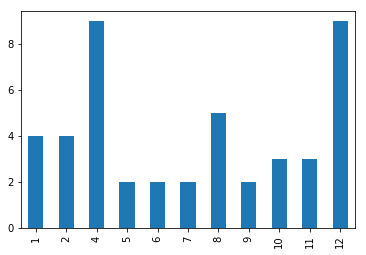

In [139]:
# 5. In what months of the year have Helen Mirren movies been most often released?

c = cast
c = c[c.name == 'Helen Mirren'][['title', 'year']].drop_duplicates()
c = c.join(rd, ['title', 'year'])
c = c[c.country == 'USA']
c.date.dt.month.value_counts().sort_index().plot(kind='bar')

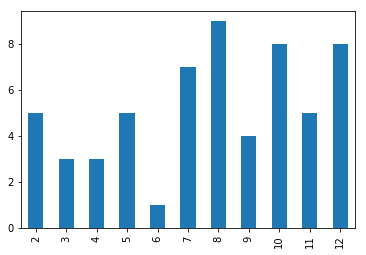

In [140]:
# 5. …Jeff Bridges movies?

c = cast
c = c[c.name == 'Jeff Bridges'][['title', 'year']].drop_duplicates()
c = c.join(rd, ['title', 'year'])
c = c[c.country == 'USA']
c.date.dt.month.value_counts().sort_index().plot(kind='bar')

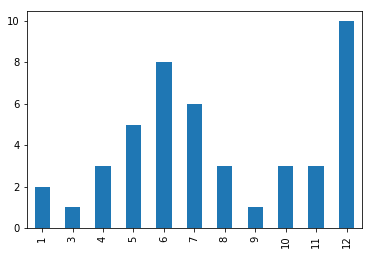

In [141]:
# 5. …Tom Cruise movies?

c = cast
c = c[c.name == 'Tom Cruise'][['title', 'year']].drop_duplicates()
c = c.join(rd, ['title', 'year'])
c = c[c.country == 'USA']
c.date.dt.month.value_counts().sort_index().plot(kind='bar')

In [142]:
%%time
# 5. Use join() to build a table of release dates indexed by actor,
#    and use it to re-run the previous three questions efficiently.

c = cast
c = c[['name', 'title', 'year']]
c = c.join(rd, ['title', 'year'])
c = c[c.country == 'USA']
c = c.set_index('name').sort_index()
releases = c
releases.head()

CPU times: user 8.6 s, sys: 1.81 s, total: 10.4 s
Wall time: 10.7 s


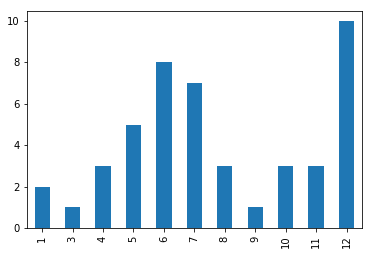

In [143]:
releases.loc['Tom Cruise'].date.dt.month.value_counts().sort_index().plot(kind='bar')

In [144]:
# pivot(self, index=None, columns=None, values=None)

In [145]:
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [146]:
c = cast
c = c[c.year >= 1990]
c = c[c.year <= 1993]
c = c[c.name == 'George Clooney']
#c = c[c.title == 'Inception']
#c = c[c.n.notnull()]
#c = c.pivot('name', 'year', 'title')
c.fillna('')

,title,year,name,type,character,n
433830,The Harvest,1992,George Clooney,actor,Lip Syncing Transvestite,23.0
433840,Unbecoming Age,1992,George Clooney,actor,Mac,5.0


In [147]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#Beings,2015,Romania,2015-01-29
2,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
3,#Horror,2015,USA,2015-11-20
4,#Horror,2015,UK,2016-05-16


In [148]:
r = release_dates
r = r[r.title.str.startswith('Star Wars: Episode')]
r = r[r.country.str.startswith('U')]
r.pivot('title', 'country', 'date')
#r.pivot('country', 'title', 'date')

country,UK,USA,Ukraine,United Arab Emirates,Uruguay
title,,,,,
Star Wars: Episode I - The Phantom Menace,1999-07-15,1999-05-19,NaT,1999-08-25,1999-07-02
Star Wars: Episode II - Attack of the Clones,2002-05-16,2002-05-16,2002-06-08,2002-05-16,2002-07-05
Star Wars: Episode III - Revenge of the Sith,2005-05-19,2005-05-19,NaT,2005-05-19,2005-05-18
Star Wars: Episode IX,2019-06-21,2019-05-24,NaT,NaT,NaT
Star Wars: Episode V - The Empire Strikes Back,1980-05-21,1980-06-20,NaT,NaT,1981-01-15
Star Wars: Episode VI - Return of the Jedi,1983-06-02,1983-05-25,NaT,NaT,1984-01-01
Star Wars: Episode VII - The Force Awakens,2015-12-17,2015-12-18,2015-12-17,2015-12-17,2015-12-17


In [149]:
r = release_dates
r = r[r.title.str.startswith('Star Wars: Episode')]
r = r[r.country.str.startswith('U')]
r.set_index(['title', 'country'])[['date']].unstack()

date             \
country                                                UK        USA   
title                                                                  
Star Wars: Episode I - The Phantom Menace      1999-07-15 1999-05-19   
Star Wars: Episode II - Attack of the Clones   2002-05-16 2002-05-16   
Star Wars: Episode III - Revenge of the Sith   2005-05-19 2005-05-19   
Star Wars: Episode IX                          2019-06-21 2019-05-24   
Star Wars: Episode V - The Empire Strikes Back 1980-05-21 1980-06-20   
Star Wars: Episode VI - Return of the Jedi     1983-06-02 1983-05-25   
Star Wars: Episode VII - The Force Awakens     2015-12-17 2015-12-18   

                                                           \
country                                           Ukraine   
title                                                       
Star Wars: Episode I - The Phantom Menace             NaT   
Star Wars: Episode II - Attack of the Clones   2002-06-08   
Star Wars: Episode III - Revenge of the Sith          NaT   
Star Wars: Episode IX                                 NaT   
Star Wars: Episode V - The Empire Strikes Back        NaT   
Star Wars: Episode VI - Return of the Jedi            NaT   
Star Wars: Episode VII - The Force Awakens     2015-12-17   

                                                                                
country                                        United Arab Emirates    Uruguay  
title                                                                           
Star Wars: Episode I - The Phantom Menace                1999-08-25 1999-07-02  
Star Wars: Episode II - Attack of the Clones             2002-05-16 2002-07-05  
Star Wars: Episode III - Revenge of the Sith             2005-05-19 2005-05-18  
Star Wars: Episode IX                                           NaT        NaT  
Star Wars: Episode V - The Empire Strikes Back                  NaT 1981-01-15  
Star Wars: Episode VI - Return of the Jedi                      NaT 1984-01-01  
Star Wars: Episode VII - The Force Awakens               2015-12-17 2015-12-17

In [150]:
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [151]:
t = titles

t.head()

,title,year
0,Closet Monster,2015
1,Suuri illusioni,1985
2,Battle of the Sexes,2017
3,Secret in Their Eyes,2015
4,Steve Jobs,2015


In [ ]:
c = cast
c = c[c.title == 'Hamlet']
c = c.set_index(['year', 'character'])#.unstack('type')
c

In [ ]:
c = cast
c = c[c.title == 'Hamlet']
c = c.set_index(['year', 'type'])#.unstack('type')
c